In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. признаки по одному
## 1.1 Колич.

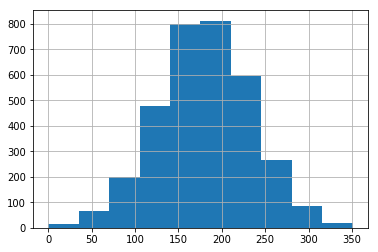

In [14]:
df['Total day minutes'].hist();

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


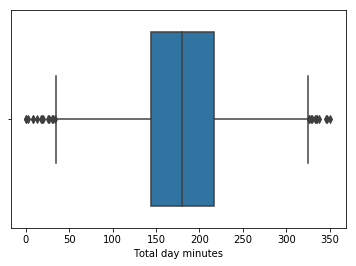

In [16]:
sns.boxplot(df['Total day minutes']);

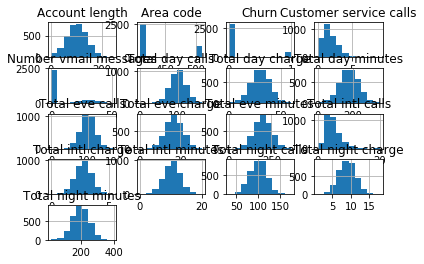

In [17]:
df.hist();

# 1.2 Категориальные признаки

In [25]:
df['Churn'].value_counts().head()

False    2850
True      483
Name: Churn, dtype: int64

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


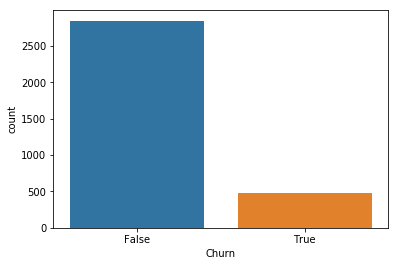

In [28]:
sns.countplot(df['Churn']);

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


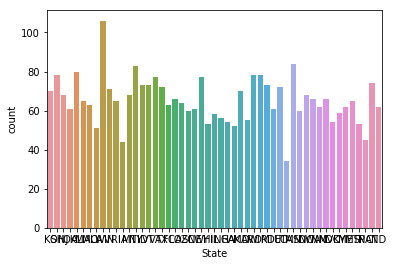

In [29]:
sns.countplot(df['State']);

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


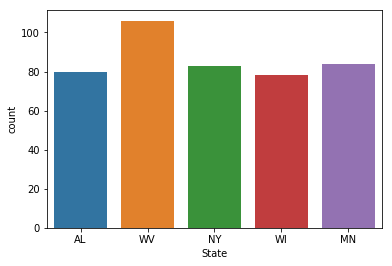

In [34]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# 2. Взаимодействия признаков
## 2.1 Колич-колич.

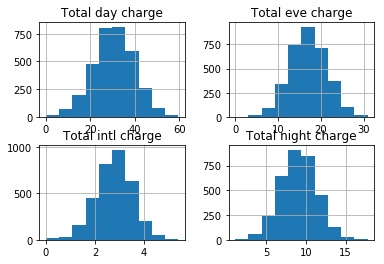

In [38]:
feat = [f for f in df.columns if 'charge' in f]
df[feat].hist();

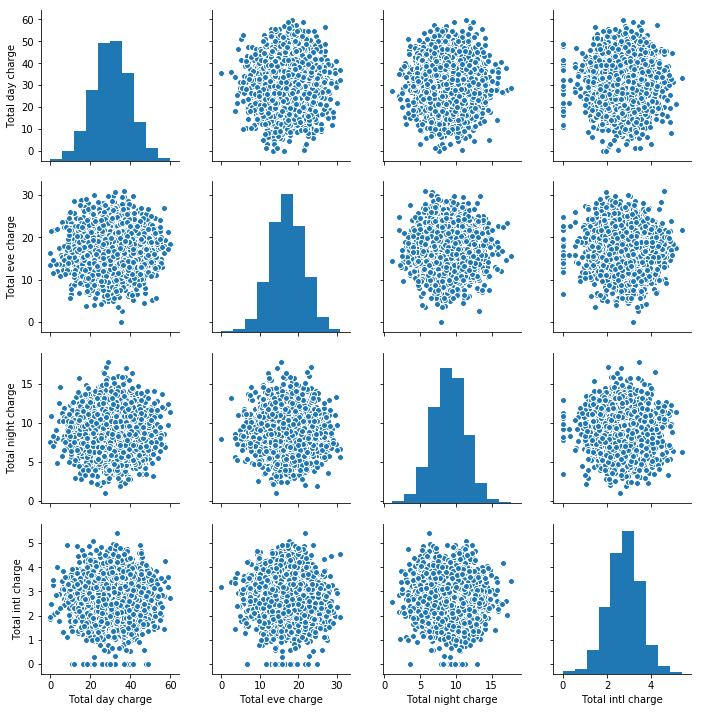

In [40]:
sns.pairplot(df[feat]);

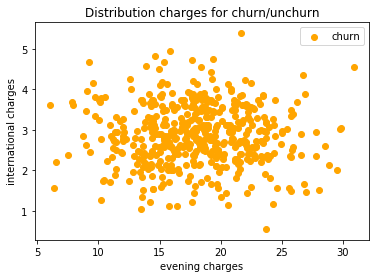

In [59]:
    plt.scatter(df[df['Churn']]['Total eve charge'],
                df[df['Churn']]['Total intl charge'],
               color = 'orange',
               label = 'churn');
    plt.xlabel('evening charges');
    plt.ylabel('international charges');
    plt.title('Distribution charges for churn/unchurn');
    plt.legend();

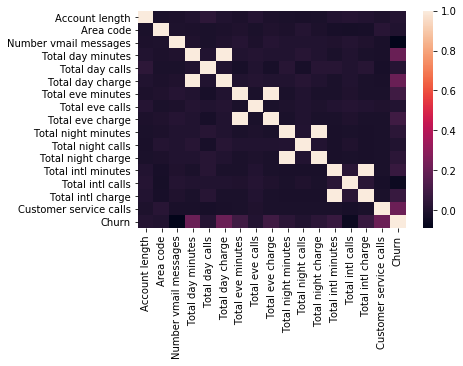

In [61]:
sns.heatmap(df.corr());

In [68]:
df.drop(feat,axis = 1, inplace=True)

ValueError: labels ['Total day charge' 'Total eve charge' 'Total night charge'
 'Total intl charge'] not contained in axis

In [69]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

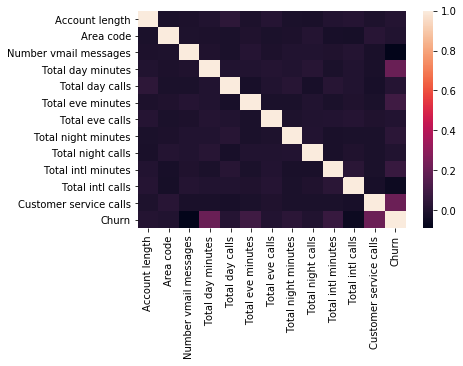

In [70]:
sns.heatmap(df.corr());

## 2.2. Колич-катег + колич-бинар

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


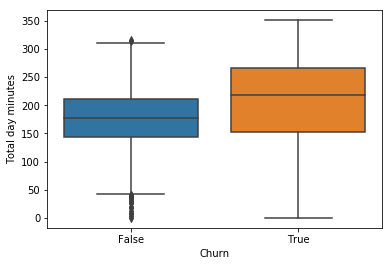

In [73]:
sns.boxplot(x='Churn', y = 'Total day minutes', data=df);

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


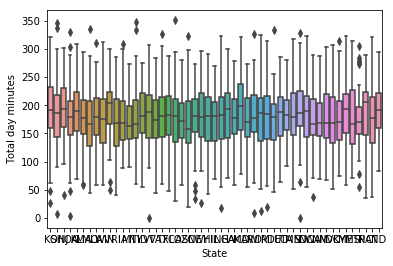

In [74]:
sns.boxplot(x='State', y = 'Total day minutes', data=df);

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


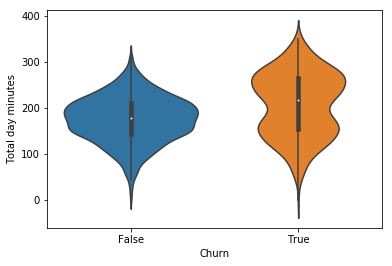

In [76]:
sns.violinplot(x='Churn', y = 'Total day minutes', data=df);

In [79]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


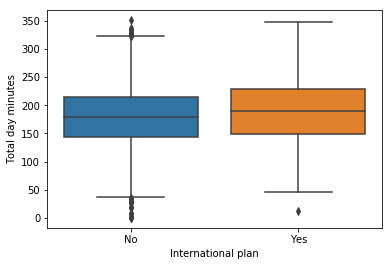

In [80]:
sns.boxplot(x='International plan', y = 'Total day minutes', data=df);

## 2.3 категориальные-категориальные

In [82]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


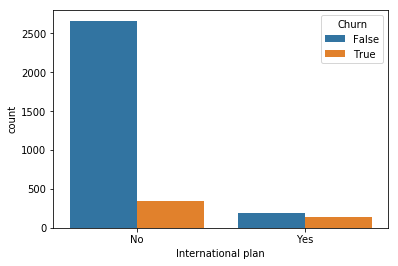

In [83]:
sns.countplot(x='International plan', hue='Churn',data=df);

/home/antikov/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


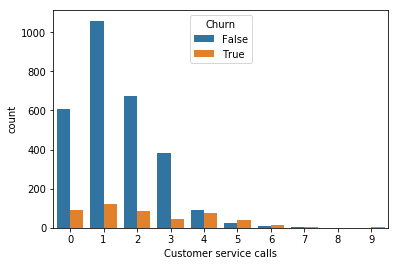

In [85]:
sns.countplot(x = 'Customer service calls', hue='Churn', data=df);

In [86]:
from sklearn.manifold import TSNE

/home/antikov/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/antikov/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
tsne = TSNE(random_state=0)

In [89]:
df2 = df.drop('State',axis=1)

In [100]:
df2['International plan'] = df['International plan'].map({'Yes':1,'No':0})
df2['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})

In [103]:
%%time
tsne.fit(df2)

CPU times: user 1min 4s, sys: 4.36 s, total: 1min 8s
Wall time: 1min 9s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=0)

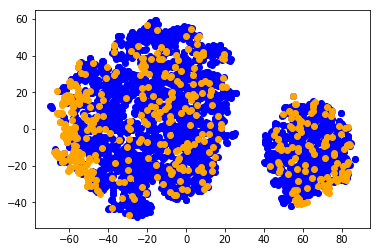

In [115]:
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0],
            tsne.embedding_[~df2['Churn'].values, 1], color = 'blue');
plt.scatter(tsne.embedding_[df2['Churn'].values, 0],
            tsne.embedding_[df2['Churn'].values, 1], color = 'orange');

In [107]:
df2['Churn'].values

array([False, False, False, ..., False, False, False])

In [111]:
tsne.embedding_[df2['Churn'].values, 0].shape

(483,)